In [6]:
import random

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 100

# Generate x values from -5 to 5
x = np.linspace(-5, 5, num_points)

# Generate noise from a normal distribution with standard deviation of 1
noise = np.random.normal(loc=0, scale=2, size=num_points)

# Generate y values above or below the line y = x based on noise
y = x + noise
labels = np.where(y > x, 1, 0)

In [21]:
class Perceptron:

    def __init__(self, lr=0.01, epochs=1000, thresh=0, eps=0.0001):
        # random.seed = seed
        self.lr = lr
        self.epochs = epochs
        self.thresh = thresh
        self.eps = eps
        self.b = [random.uniform(-1, 1) for _ in range(2)]
        self.e = random.uniform(-1, 1)

    def predict(self, x, y):
        if self.b[0] * x + self.b[1] * y + self.e >= self.thresh:
            return 1
        return 0

    def update(self, x, y, labels):
        acc = 0
        for i in range(len(x)):
            pred = self.predict(x[i], y[i])
            if pred != labels[i]:
                self.b[0] += self.lr * (labels[i] - pred) * x[i]
                self.b[1] += self.lr * (labels[i] - pred) * y[i]
                self.e += self.lr * (labels[i] - pred)
            else:
                acc += 1
        loss = 1 - (acc / len(x))
        return loss

    def train(self, x, y, labels):
        for i in range(self.epochs):
            loss = self.update(x, y, labels)
            # print(f"{i}, {self.b[0]:.2f}, {self.b[1]:.2f}, {self.e:.2f}, {loss:.2f}")
            if self.is_update(i):
                self.plot(x, y, labels, i, loss)
            if loss < self.eps:
                break
        self.plot(x, y, labels, i, loss)

    def is_update(self, i):
        while i > 10:
            i /= 10
            
        return i % 1 == 0

    def plot(self, x, y, labels, epoch, loss):
        pos = [i for i in range(len(x)) if labels[i] == 1]
        neg = [i for i in range(len(x)) if labels[i] == 0]

        m = -1 * self.b[1] / self.b[0]
        bias = -1 * self.e / self.b[0] 
        guess = [m * xi + bias for xi in x]
        # Plot the initial data points and the line y = x
        plt.plot(x, guess, label=f"y = {m:.2f}x + {bias:.2f}")
        plt.scatter([x[i] for i in pos], [y[i] for i in pos], color="green", marker="x")
        plt.scatter([x[i] for i in neg], [y[i] for i in neg], color="red", marker="o")
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'epoch: {epoch} loss:{loss:.3f}')
        plt.legend()
        plt.tight_layout()
        plt.show()

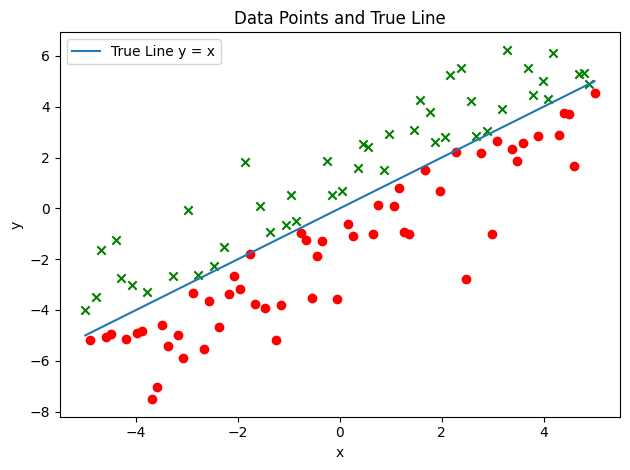

In [15]:
pos = [i for i in range(len(x)) if labels[i] == 1]
neg = [i for i in range(len(x)) if labels[i] == 0]

# Plot the initial data points and the line y = x
plt.plot(x, x, label='True Line y = x')
plt.scatter([x[i] for i in pos], [y[i] for i in pos], color="green", marker="x")
plt.scatter([x[i] for i in neg], [y[i] for i in neg], color="red", marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points and True Line')
plt.legend()
plt.tight_layout()
plt.show()

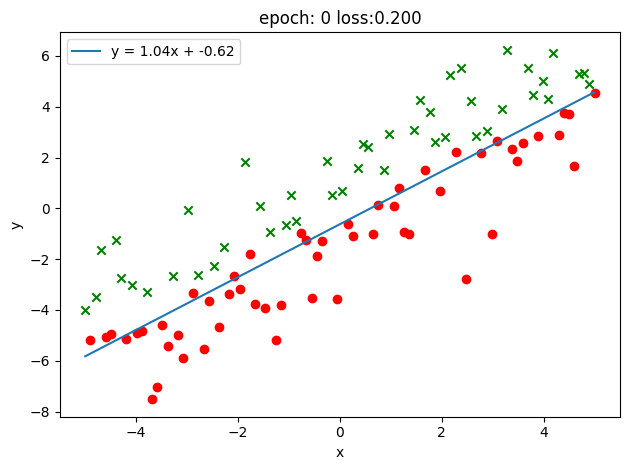

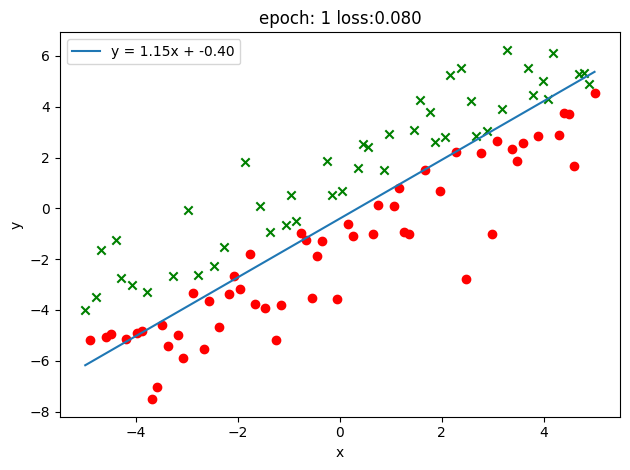

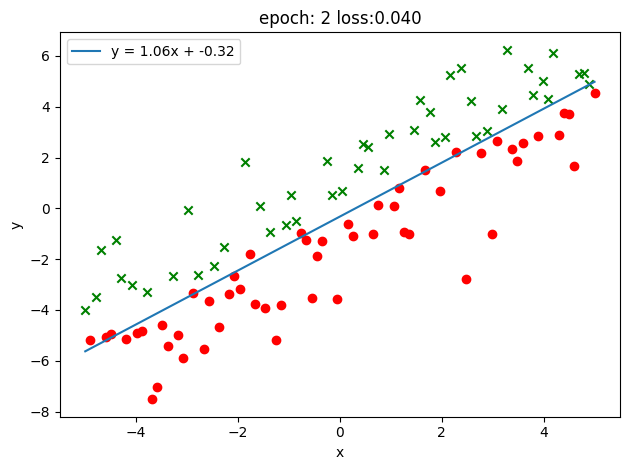

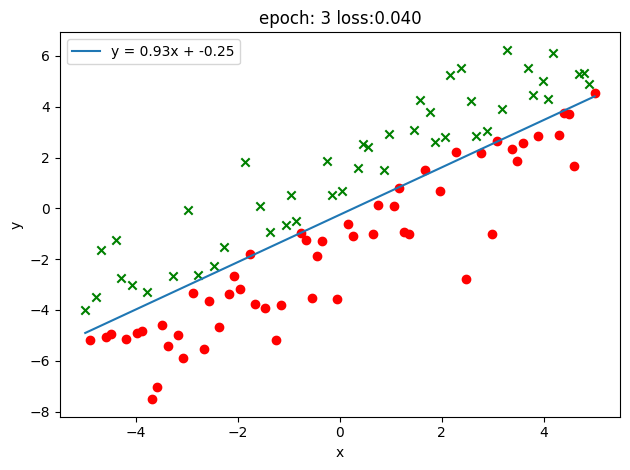

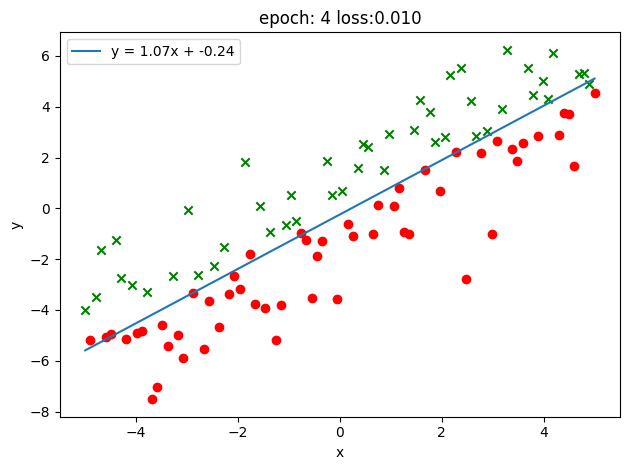

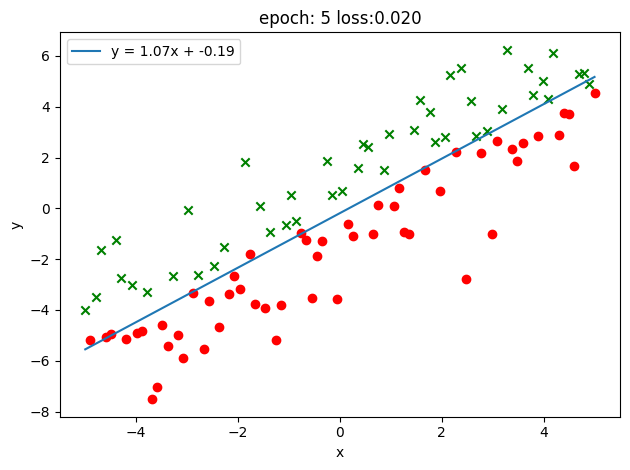

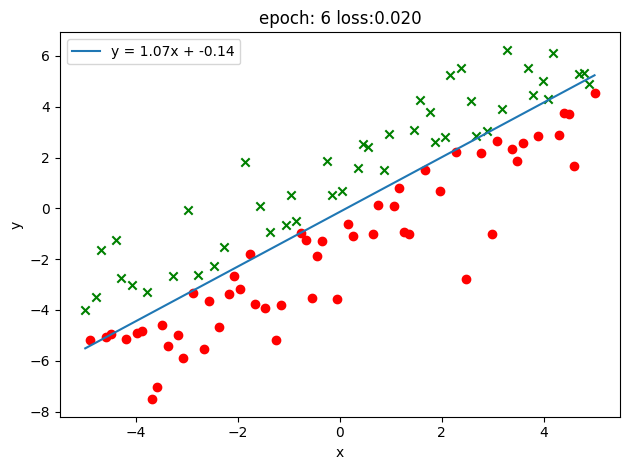

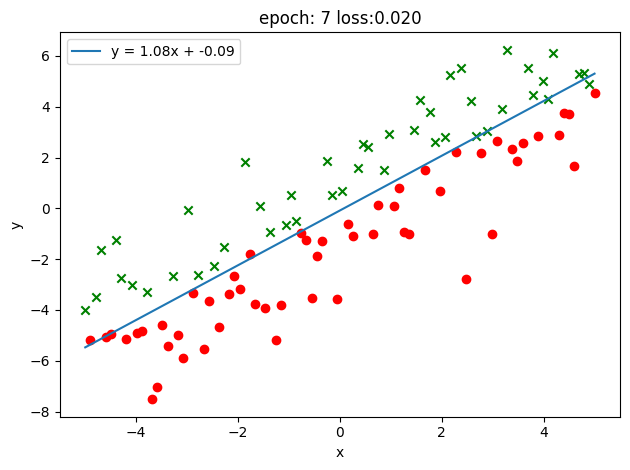

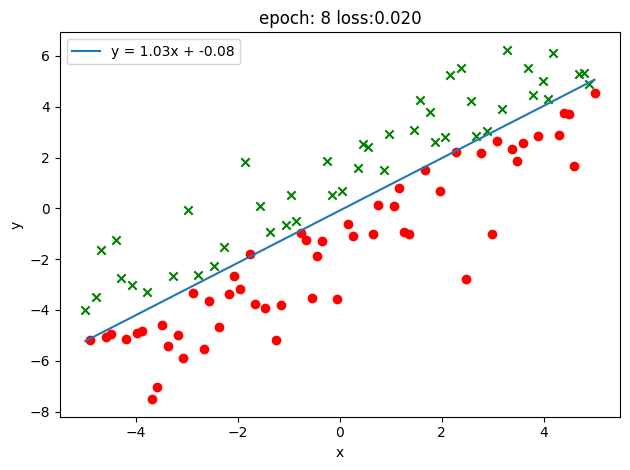

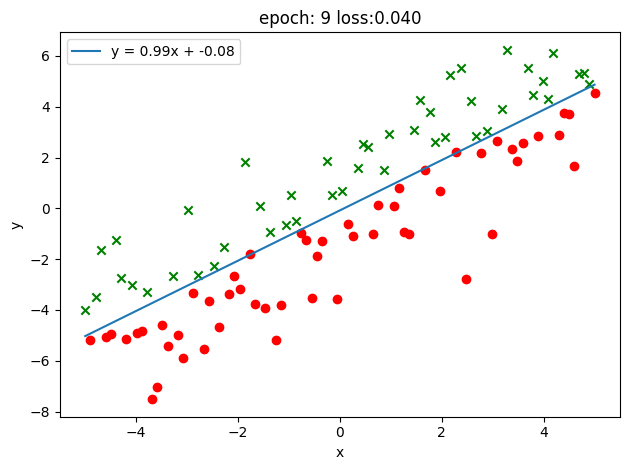

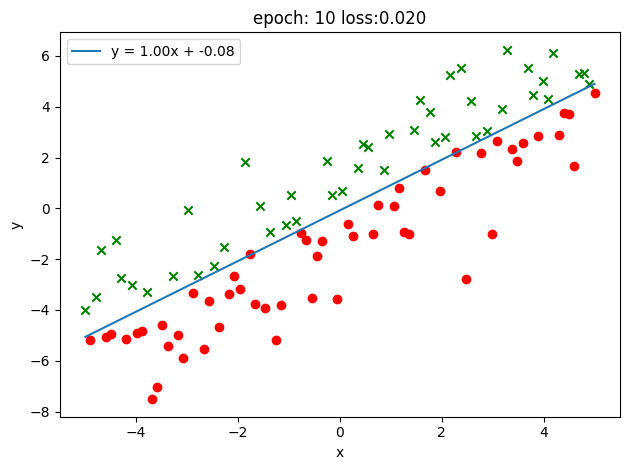

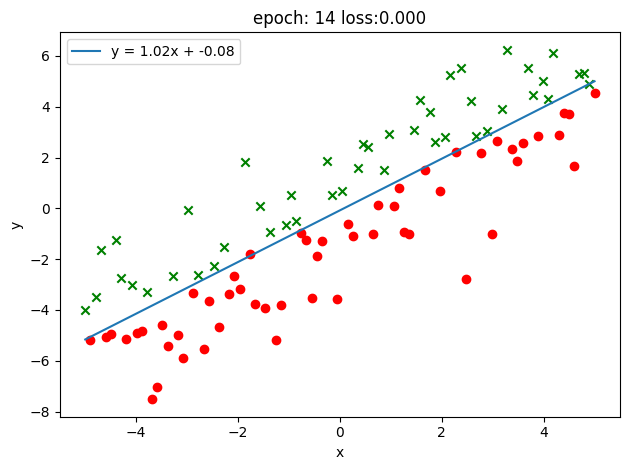

In [22]:
p = Perceptron()
p.train(x, y, labels)